<a href="https://colab.research.google.com/github/bb38122080/Shift_Kun/blob/main/ipynb/ex_Trees_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 決定木とランダムフォレスト（decision trees and random forests）

----

氏名：38122086

学生番号：松崎弘武

----
基本課題（必須）

    1. 「★scikit-learn を用いた決定木とランダムフォレスト」まで実行すると，どのような数値と図が出力されますか．また，
       特にExample 3とExample 4について，DecisionTreeClassifierのどの設定値が訓練データや検証データの正答率に影響しますか．
       理由と共に解説してください．

    それぞれのデータについて:
    Example1 OR関数データセット
    Example2 ガウス分布によるクラスター
    Example3 互いに入り組んだ半月形のデータ
    Example4 2つの同心円で内側と外側で別のクラスのデータになっているもの

    設定できる値について:
    max_depth（木の最大深さ）
    木の深さを制限することができる値。小さくすることで過学習を防ぐ。
    min_samples_split（ノードを分割するために必要な最小サンプル数)
    ノードを作るために必要な最小の値を設定できる。
    小さなノードに分割されるのを防ぎ、汎用性を上げることができる
    min_samples_leaf（葉ノードに必要な最小サンプル数）
    葉を作るために必要な最小の値を設定できる。

    実行結果:

    記述がないところは、model = DecisionTreeClassifier(criterion='entropy', splitter='best')を使用している。

    Example1
    Accuracy on training data:  1.0
    Accuracy on validation data:  1.0

    分岐点が2つの決定木が生成された。
    左下が0.5の正方形で囲まれた決定境界がひかれた。
    Example2
    Accuracy on training data:  1.0
    Accuracy on validation data:  0.9333333333333333

    分岐点が1つの決定木が生成された。
    赤と青を横一直線で区切るように決定境界がひかれた。

    Example3
    Accuracy on training data:  1.0
    Accuracy on validation data:  0.91
    分岐点が12の決定木が生成された。
    訓練データを取り逃さないようにジグザグに決定境界がひかれた。

    max_depth=5を追加
    Accuracy on training data:  0.98
    Accuracy on validation data:  0.92
    分岐点が9の決定木が生成された。
    追加前よりもジグザグの折り返しの数が少なくなった。
    赤領域内に細い四角で囲まれた青領域が生成された。

    min_samples_leaf=10を追加
    Accuracy on training data:  0.84
    Accuracy on validation data:  0.84
    分岐点が6の決定木が生成された。
    4回しか曲がっていない横に分ける決定境界がひかれた。

    Example4
    Accuracy on training data:  1.0
    Accuracy on validation data:  0.8533333333333334
    分岐点が	11の決定木が生成された。
    赤の領域を囲むための4つの正方形が生成された。

    min_samples_leaf=10を追加
    Accuracy on training data:  0.96
    Accuracy on validation data:  0.9133333333333333
    分岐点が	6の決定木が生成された。
    赤の領域を囲むための四角形が1つ生成された。

    max_depth=5を追加
    Accuracy on training data:  0.9733333333333334
    Accuracy on validation data:  0.8733333333333333
    分岐点が	6の決定木が生成された。
    赤の領域を囲むための四角形が1つ生成された。

    設問への回答:
    max_depth,min_samples_split,min_samples_leafの設定値が正答率へ影響する。
    max_depthは木の深さの最大値であるため小さくするほど、学習を制限するためtraining dataへの正答率が下がる。また、過学習が発生している場合は汎用性を上がるため validation dataへの正答率は上がる。min_samples_split,min_samples_leafは分岐を作るために必要なデータの最小値であるため大きくするほど、学習を制限する。
    また、設定値を変更することでtraining dataが下がりvalidation dataが上がっていることからも設定値が過学習を制御する値だとわかる。

    2. Example 3とExample 4について，ランダムフォレストによる識別の結果は決定木とどのように異なりますか．
       これらの例から，特にどのような性質をもつデータに対して，どのような設定でアンサンブル学習を適用すると，
       その効果を期待できると考えられますか．理由と共に述べてください．

    結果:
    Example3
    n_estimators=1300, max_samples=30
    Accuracy on training data:  0.97
    Accuracy on validation data:  0.9
    実行時間:7秒
    三日月に合うような曲線(ふにゃふにゃな線)がひかれた。
    Example 4
    Accuracy on training data:  0.9733333333333334
    Accuracy on validation data:  0.92
    中心を曲線(ふにゃふにゃな線)で囲む境界がひかれた。

    設定値について:
    n_estimators
    生成する決定木の数を設定します。
    増加させることで安定性と汎用性は上昇するが、計算コストも増えてしまう。
    max_samples
    １つの決定木において利用するサンプルの数を指定します。
    小さくすることで学習を抑制する効果がある。

    設問への回答:
    決定境界が決定木の時と違い、細かく振動しているような曲線で引かれているため非線形で複雑なデータに対して適切である。また、多くの決定木を使って判別するため多少のノイズの影響であれば小さくすることが可能であるためノイズがあるようなデータでも適切である。
    設定値については、各データについて合わせる必要があると考える。具体的には、決定境界が少ないデータによって歪んでしまっている場合、trainingdataに対して100％であるがvalidationdataに対しては100％ではない場合は過学習が疑われているため設定値を調整する。


    3. DecisionTreeClassifierを用いてランダムフォレストを実装してください．





    4.その他，気づいたこと，調べたことを書いてください．

    検証:
    n_estimators,max_samplesの変化は結果にどう影響するのか。
    方法:
    Example3でn_estimators,max_samplesをそれぞれ変更していく
    結果:
    n_estimators
    n_estimators=1300, max_samples=30
    Accuracy on training data:  0.97
    Accuracy on validation data:  0.9
    実行時間:7秒
    三日月に合うような曲線(ふにゃふにゃな線)がひかれた。
    n_estimators=2000, max_samples=30
    Accuracy on training data:  0.97
    Accuracy on validation data:  0.88
    実行時間:8秒
    三日月に合うような曲線(ふにゃふにゃな線)がひかれた。
    n_estimators=4000, max_samples=30
    Accuracy on training data:  0.97
    Accuracy on validation data:  0.89
    実行時間:13秒
    三日月に合うような曲線(ふにゃふにゃな線)がひかれた。

    max_samples
    n_estimators=1300, max_samples=30
    Accuracy on training data:  0.97
    Accuracy on validation data:  0.9
    三日月に合うような曲線(ふにゃふにゃな線)がひかれた。

    n_estimators=1300, max_samples=20
    Accuracy on training data:  0.96
    Accuracy on validation data:  0.9
    三日月に合うような曲線(ふにゃふにゃな線)がひかれた。

    n_estimators=1300, max_samples=10
    Accuracy on training data:  0.92
    Accuracy on validation data:  0.9
    三日月に合うような曲線(ふにゃふにゃな線)がひかれた。

    まとめ:
    n_estimatorsを増加させると計算量が増加し実行時間も増大していることがわかる。また、多くの決定木を生成するため若干の過学習が発生していることも確認できる。
    max_samplesを減少させることで学習に制限がかかりtraining dataに対しての正答率が下がっていることがわかる。


----
発展課題（任意）がこのノートブックの後半にあります．

In [24]:
#@title [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)の基本的な使い方
from IPython.display import HTML, IFrame
IFrame("https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html", width=960, height=320)

Accuracy on training data:  1.0
Accuracy on validation data:  0.8703703703703703


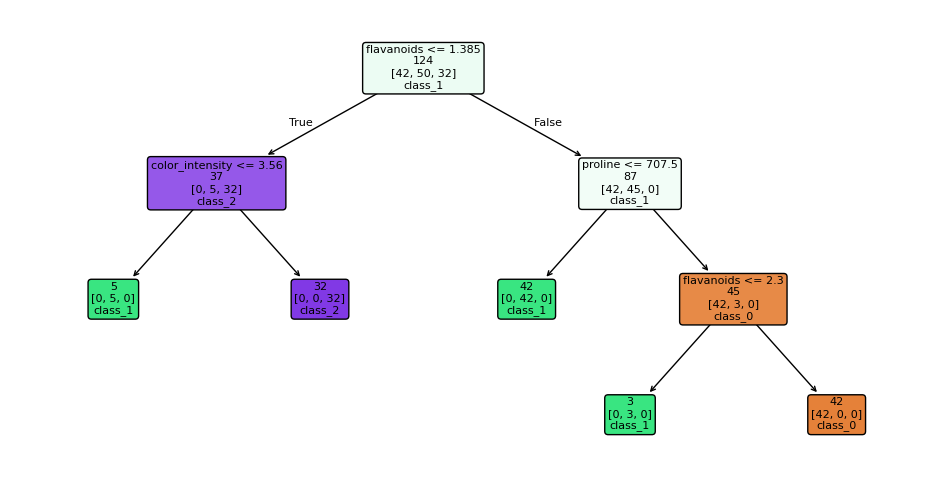

In [25]:
# データの用意
import numpy as np
from sklearn.datasets import load_wine
from  sklearn.model_selection import train_test_split

#The Wine Recognition database from UCI, to determine the origin of wines using chemical analysis
# https://archive.ics.uci.edu/ml/datasets/wine
dataset = load_wine()
X, X_val, y, y_val = train_test_split(dataset.data, dataset.target, test_size=0.30)#, random_state=0)


# 決定木
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0)
model.fit(X, y)

print("Accuracy on training data: ", model.score(X, y))
print("Accuracy on validation data: ", model.score(X_val, y_val))
y_pred = model.predict(X_val)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plot_tree(model, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names,
          label='none', impurity=False, rounded=True, fontsize=8);

In [26]:
#@title 混同行列（行：正解，列：予測）
from sklearn import metrics
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

cm = metrics.confusion_matrix(y_val, y_pred)
print(cm)

#print(cm.sum(axis=0)

[[15  2  0]
 [ 2 18  1]
 [ 0  2 14]]


--------

In [27]:
#@title 2次元に2クラスを描く `plot2cls` を定義します（理解不要）．
%matplotlib inline
!wget -q -N https://gist.githubusercontent.com/tsakai-g/1920bc185be0c497579968e00a9b3674/raw/plot2cls.py
%run plot2cls.py

<Figure size 640x480 with 0 Axes>

### 実験用のデータ（2次元，2クラス）を生成します．
- Example 1～4 からひとつ選んで実行してください．

In [45]:
# Example 1: y = or(x1, x2)
X = np.array([[0, 0], [1,0], [0,1], [1,1]])
y = np.array([-1,1,1,1])

X_val = X + np.random.randn(4, 2) * 0.2
y_val = y.copy()

In [48]:
# Example 2: draw npos and nneg points from the Gaussian distribution for each class
npos = 30
nneg = 30
np.random.seed(321)
X = np.r_[np.random.randn(npos, 2) + [3, 3], np.random.randn(nneg, 2)]
# [1,1,...,1,-1,-1,...,-1]
y = np.array([1] * npos + [-1] * nneg)

X_val = X + np.random.randn(X.shape[0], 2) * 1.0
y_val = y.copy()

In [96]:
# Example 3: create moons using sklearn
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.3, random_state=0)
y[y==0] = -1

X_val, y_val = make_moons(n_samples=100, noise=0.3, random_state=1)
y_val[y_val==0] = -1

In [73]:
# Example 4: create circles using sklearn
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=150, noise=0.2, random_state=0, factor=0.3)
y[y==0] = -1

X_val, y_val = make_circles(n_samples=150, noise=0.2, random_state=1, factor=0.3)
y_val[y_val==0] = -1

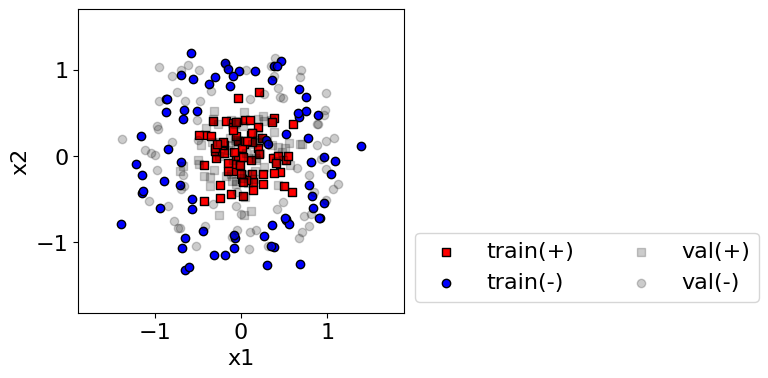

In [74]:
#@title データを表示します．
plot2cls(X, y, X_val=X_val, y_val=y_val).plot_data()

### ★scikit-learn を用いた決定木とランダムフォレスト

Accuracy on training data:  1.0
Accuracy on validation data:  0.91


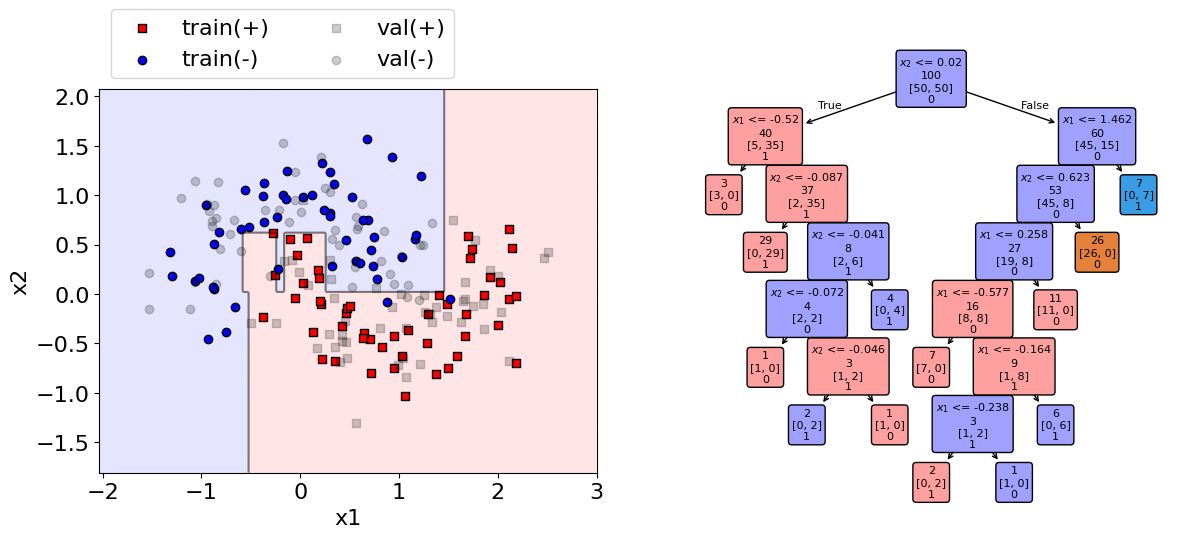

In [97]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion='entropy', splitter='best')#, min_samples_leaf=10),max_depth=
model.fit(X, y)

print("Accuracy on training data: ", model.score(X, y))
print("Accuracy on validation data: ", model.score(X_val, y_val))

dec = lambda X: model.predict_proba(X)[:,1]*2-1
plot2cls(X, y, dec, X_val, y_val).plot_clf()

feature_names = ['$x_1$', '$x_2$']
class_names=['0', '1']
arts = plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names,
          label='none', impurity=False, rounded=True, fontsize=8);

from matplotlib.colors import to_rgb
for art, v in zip(arts, model.tree_.value):
  bbox = art.get_bbox_patch()
  if bbox is not None:  # Noneでない場合に色を設定
    art.get_bbox_patch().set_facecolor(to_rgb(['#a0a0ff', '#ffa0a0'][np.argmax(v)]))

#show_tree(model)

Accuracy on training data:  0.96
Accuracy on validation data:  0.9


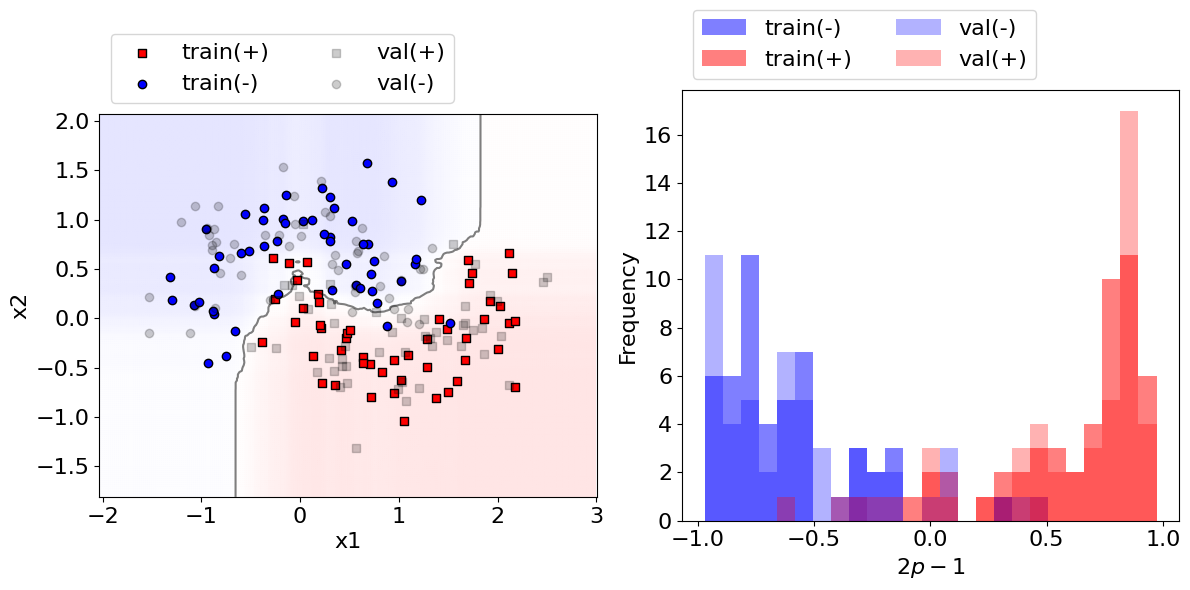

In [126]:
from sklearn.ensemble import RandomForestClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model = RandomForestClassifier(criterion='entropy', n_estimators=1300, max_samples=20)#,max_depth = 10
model.fit(X, y)

print("Accuracy on training data: ", model.score(X, y))
print("Accuracy on validation data: ", model.score(X_val, y_val))

dec = lambda X: model.predict_proba(X)[:,1]*2-1
plot2cls(X, y, dec, X_val, y_val).plot_clf(xlabel="$2p-1$")

## ランダムフォレスト

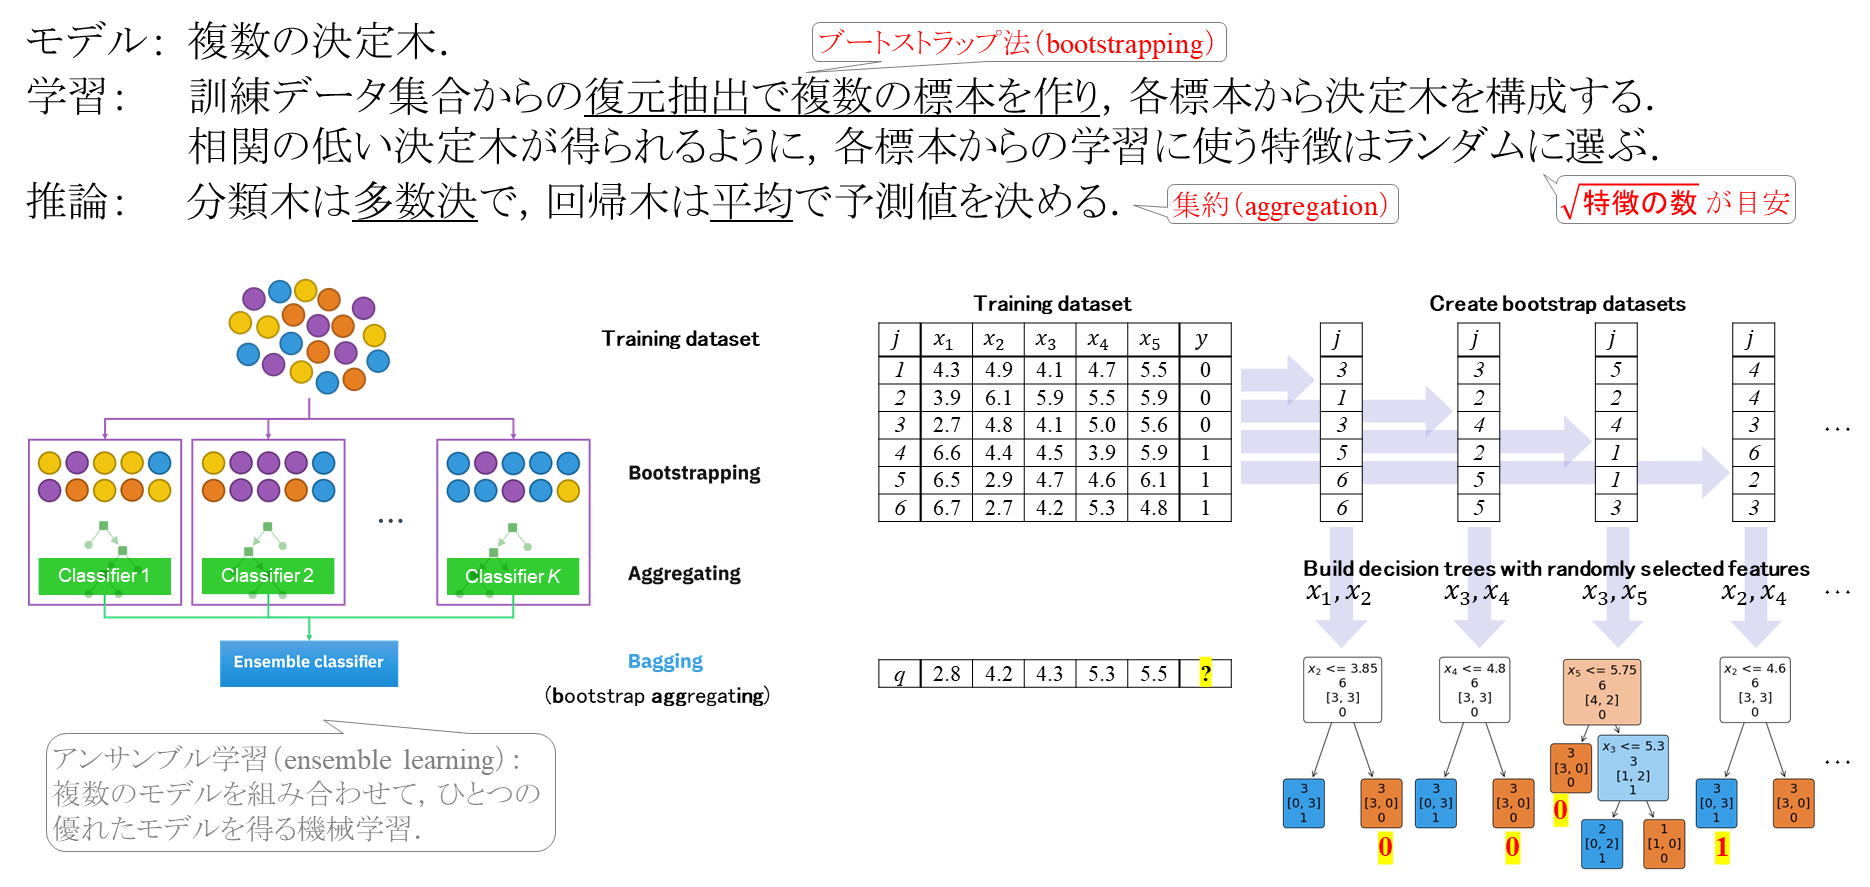

## ★ランダムフォレストの実装

sklearnの[`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)を用いて，`myRandomForestClassifier`という名のクラスとして実装しましょう．[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) に似た仕様とします．

訓練データ `X_train` とクラスラベル `y_train` から `n_estimators` 個の決定木を作成したあと，`X_val` のクラスラベルの予測 `y_pred` や各クラスの得票率 `y_proba` を得たり，正答率を表示するには，
```
    myclf = myRandomForestClassifier(n_estimators=300, max_samples=None)
    myclf.fit(X_train, y_train)
    y_pred = myclf.predict(X_val)
    y_proba = myclf.predict_proba(X_val)
    print(myclf.score(X_val, y_val))
```
のように使うことを想定します．
- 訓練データの次元数`d`，個数`n`の場合，`X_train` と `y_train` はそれぞれ shape が `(n,d)` と `(n,)` のNumPy配列です．
- `myRandomForestClassifier` の引数 `n_estimators` は決定木の数，`max_samples` はブートストラップで復元抽出する際の訓練データの数です．`max_samples=None` は`max_samples=n` と同じとします．
- `myRandomForestClassifier` は，`n_estimators` と `max_samples` の他，[`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) に渡すための引数として `criterion='gini'`, `splitter='best'`, `max_depth=None`, ... などを指定できるように実装するとよいでしょう．

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# (X, y) から max_samples 個を復元抽出する関数です．
def bootstrap(X, y, max_samples):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, max_samples, replace=True)  # 0～(n_samples-1)からmax_samples個を復元抽出
    return X[idxs], y[idxs]


class myRandomForestClassifier:

    def __init__(self, n_estimators=100, max_samples=None, criterion='gini', splitter='best', max_depth=None):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.criterion = criterion
        self.splitter = splitter
        self.max_depth = max_depth
        self.estimators = []
        self.classes = None


    # 学習：n_estimators 個の決定木を作ります．
    def fit(self, X, y):

        # クラスを表す整数のリスト
        self.classes = np.unique(y)

        b_samples = self.max_samples if self.max_samples is not None else X.shape[0]#復元抽出する個数．max_samples が None ならば X.shape[0] 個全部． '''

        self.estimators = []
        for _ in range(self.n_estimators):
            Xb, yb = bootstrap(X, y, b_samples)  # Xとyからb_samples個をbootstrapで復元抽出します
            tree = DecisionTreeClassifier(
                criterion=self.criterion,
                splitter=self.splitter,
                max_depth=self.max_depth
            )  # 決定木を用意
            tree.fit(Xb, yb)
            self.estimators.append(tree)


    # 推論：各クラスの得票率を答えます．
    def predict_proba(self, X):
        preds = np.array([clf.predict(X) for clf in self.estimators]).T       # (n, n_estimators)
        y_counts = [list(map(lambda c: len(y[y==c]), self.classes)) for y in preds]
        return np.array(y_counts) / self.n_estimators


    # 推論：最も多く得票したクラスを答えます．
    def predict(self, X):
        proba = self.predict_proba(X)       # (n,len(self.classes))
        y_pred = np.argmax(proba, axis=1)  # ''' np.argmax() を使って得票率の最大値をもつクラスの番号を  proba から見つけます． '''
        return self.classes[y_pred]


    def score(self, X, y):
        y_pred = self.predict(X)
        return (y == y_pred).sum() / len(y)

### 実装した`myRandomForest`で識別します．

In [ ]:
model = myRandomForestClassifier(n_estimators=100, max_samples=30)
model.fit(X, y)

print("Accuracy on training data: ", model.score(X, y))
print("Accuracy on validation data: ", model.score(X_val, y_val))

dec = lambda X: model.predict_proba(X)[:,1]*2-1
plot2cls(X, y, dec, X_val, y_val).plot_clf(xlabel="$2p-1$")

--------
## 発展課題（任意）

    1. 特徴の数（特徴空間の次元数）が大きい高次元データに対して，アンサンブル学習の効果を高める工夫を述べてください．  
       また，その効果を実験的に確認できるデータ集合を探してください．
    次元の呪いについて
    特徴量が増えることでデータが高次元化してしまい精度を担保するために必要なデータ数が指数関数的に増えてしまうこと、次元が多いことで計算量も指数関数的に増えてしまうこと。また、特徴量が増えることで最低限の精度を出すためのトレーニングデータ数が増加し過学習が発生しやすくなる。

    高次元データを機械学習させるときの気を付ける点は分かったが、効果を高める工夫や実験的に確認できるデータ集合についてはわからなかった。
    2. 実装したランダムフォレストのDecisionTreeClassifierを別の識別器に差し替えてもアンサンブル学習ができます．
       どの識別器を，どのような設定値で使用すると，アンサンブル学習の効果が得られますか．


お疲れさまでした．